# CLIM 614 -- Homework #0
This homework assignment consists of three parts. Each is meant to give you some familiarity and experience with some of the basic concepts needed for this class:

* __A. Scale analysis__
    * How the magnitudes of various terms contributing to the time series of a climate state determine which are important.
* __B. Prognostic equations__
    * Visualizing the differences between state variables, fluxes and parameters.
* __C. Basic budgets__
    * Assessing closure of the terms in a budget and how to use the residual of a budget to estimate missing terms.

In [1]:
# Import useful software packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint

rng = np.random.default_rng()

# Set some universal parameters
seconds_per_day = 86400
days_per_year = 365

## A. Scale analysis
In this exercise, you will construct idealized representations of time series of temperature to 
understand how the scale of various terms lead to relatively important (and unimportant) variations.


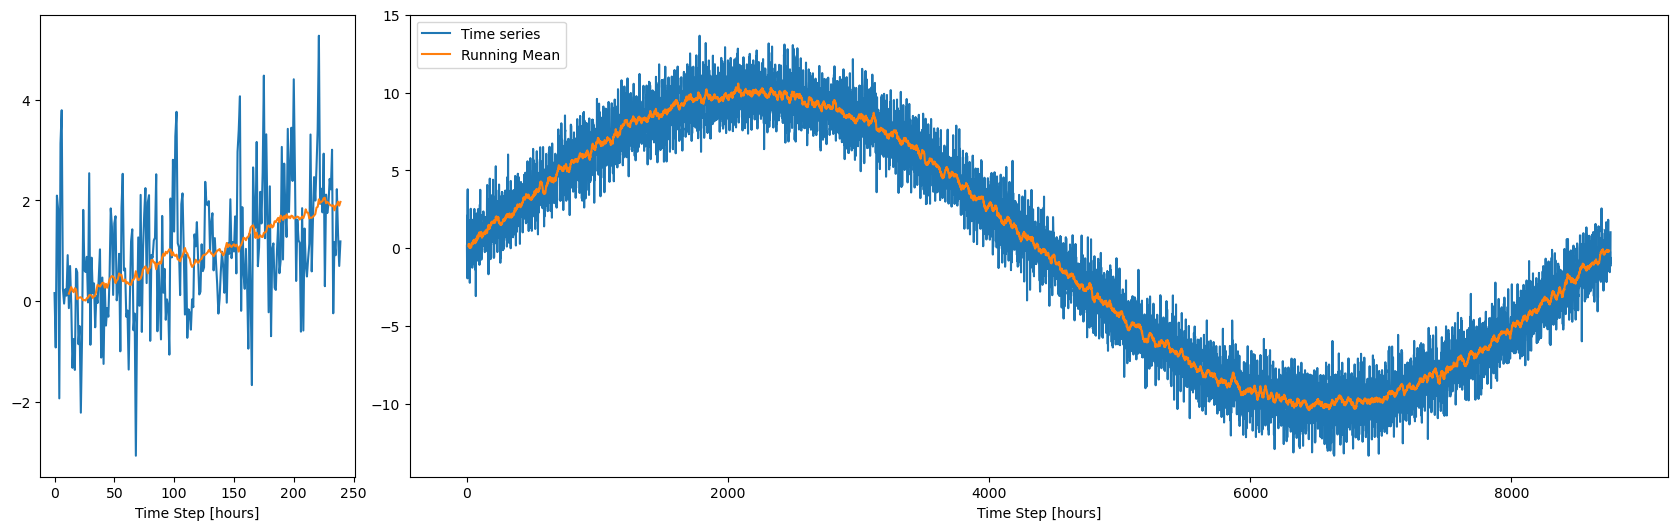

In [2]:
#########################################################
#########################################################
### Parameters for this exercise:
timestep = 3600          # in seconds
total_years = 1          # Number of years to simulate 

diurnal_magnitude = 1   # Try 1 and 10, at least
annual_magnitude = 10    # Try 1 and 10, at least
random_magnitude = 1    # Try 1 and 10, at least
#########################################################
#########################################################

# Construct a synthetic time series with multiple components.
total_steps = int(total_years * days_per_year * seconds_per_day / timestep)
time_series = np.full(total_steps,np.nan) # Set up an empty time series to fill below

for t in range(total_steps):  # Loop through each hour
    #if t % t_per_day == 0: print(".",end="")  # Uncomment this line if you want to see the loop progress
    diurnal = diurnal_magnitude * np.sin(t*timestep/seconds_per_day*np.pi*2)               # Add a diurnal cycle
    annual = annual_magnitude * np.sin(t*timestep/(days_per_year*seconds_per_day)*np.pi*2) # Add a seasonal cycle
    noise = random_magnitude * rng.standard_normal()                                   # Add Gaussian noise
    time_series[t] = diurnal + annual + noise                     # Time series is a combination of the three 
    
#¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯
# Plot the results
fig = plt.figure(figsize = (21, 6))
spec = fig.add_gridspec(ncols=2, nrows=1, width_ratios=[1,4])
plt.subplots_adjust(wspace=0.07)
ax1 = fig.add_subplot(spec[0,0])
ax2 = fig.add_subplot(spec[0,1])

# First panel is zoomed in on a 240-timestep period (10-days if timestep is hourly)
ax1.plot(time_series[:240])
ax1.plot(pd.Series(time_series).rolling(24,center=True).mean()[:240])
ax1.set_xlabel("Time Step [hours]")

# Second panel is the entire time series
ax2.plot(time_series)
plt.plot(pd.Series(time_series).rolling(24,center=True).mean())
ax2.set_xlabel("Time Step [hours]")
ax2.legend(["Time series","Running Mean"],loc=2)

### Time to tinker

Make a copy of the cell above where you can experiment: 
1. Try changing the magnitudes for diurnal, annual and random (8 possible combinations if you stick to 1 and 10 but feel free to try other values as well).
2. Change `total_years` from 1/12 to 1, and to 10. Here you are changing the time scale of visualization.

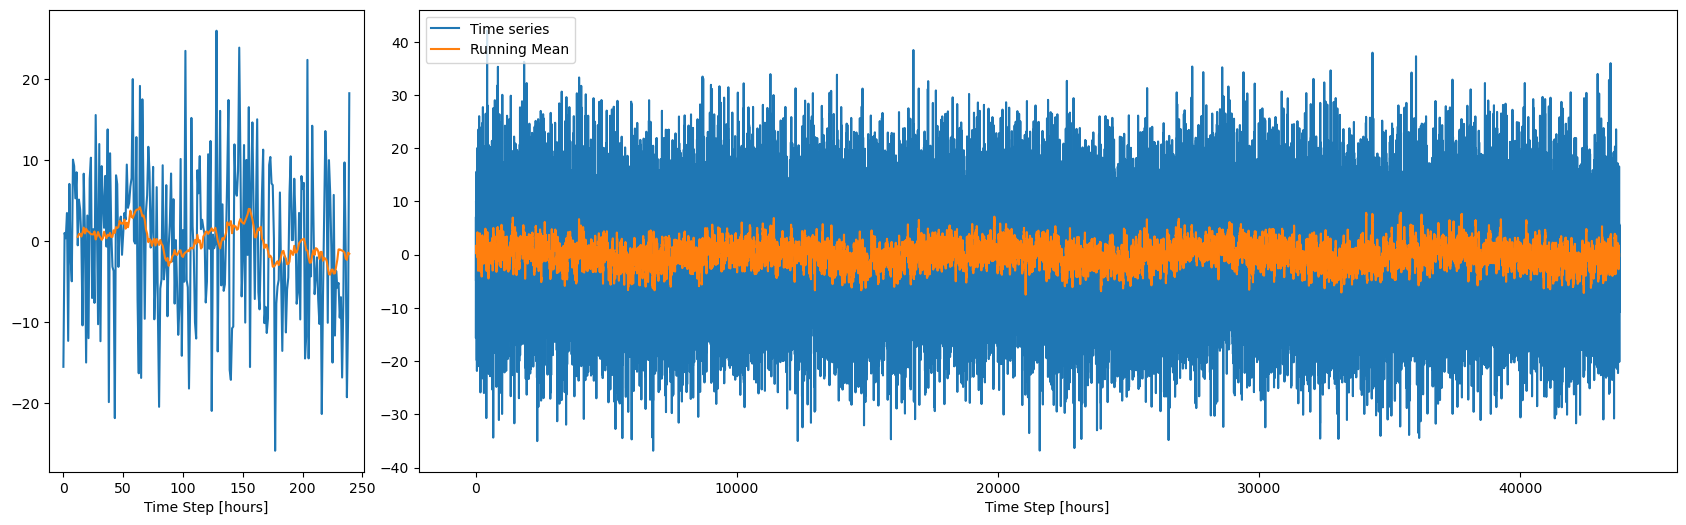

In [64]:
#########################################################
#########################################################
### Parameters for this exercise:
timestep = 3600          # in seconds
total_years = 5          # Number of years to simulate 

diurnal_magnitude = 1   # Try 1 and 10, at least
annual_magnitude = 1    # Try 1 and 10, at least
random_magnitude = 10    # Try 1 and 10, at least
#########################################################
#########################################################

# Construct a synthetic time series with multiple components.
total_steps = int(total_years * days_per_year * seconds_per_day / timestep)
time_series = np.full(total_steps,np.nan) # Set up an empty time series to fill below

for t in range(total_steps):  # Loop through each hour
    #if t % t_per_day == 0: print(".",end="")  # Uncomment this line if you want to see the loop progress
    diurnal = diurnal_magnitude * np.sin(t*timestep/seconds_per_day*np.pi*2)               # Add a diurnal cycle
    annual = annual_magnitude * np.sin(t*timestep/(days_per_year*seconds_per_day)*np.pi*2) # Add a seasonal cycle
    noise = random_magnitude * rng.standard_normal()                                   # Add Gaussian noise
    time_series[t] = diurnal + annual + noise                     # Time series is a combination of the three 
    
#¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯
# Plot the results
fig = plt.figure(figsize = (21, 6))
spec = fig.add_gridspec(ncols=2, nrows=1, width_ratios=[1,4])
plt.subplots_adjust(wspace=0.07)
ax1 = fig.add_subplot(spec[0,0])
ax2 = fig.add_subplot(spec[0,1])

# First panel is zoomed in on a 240-timestep period (10-days if timestep is hourly)
ax1.plot(time_series[:240])
ax1.plot(pd.Series(time_series).rolling(24,center=True).mean()[:240])
ax1.set_xlabel("Time Step [hours]")

# Second panel is the entire time series
ax2.plot(time_series)
plt.plot(pd.Series(time_series).rolling(24,center=True).mean())
ax2.set_xlabel("Time Step [hours]")
ax2.legend(["Time series","Running Mean"],loc=2)

### Answer some questions
In the cell below, record your observations. Be sure to comment on:
1. How do the relative magnitudes of `diurnal`, `annual` and `random` affect the appearance of the time series?
2. When the `random` magnitude is large, how does it affect the running mean? The ability to perceive the other cycles?
3. Consider `random` as *noise* and the other two cycles as *signal*. What appears to be the threshold of *signal:noise* below which *signal* becomes hard to detect?

### Answers

1. A larger `diurnal` magnitude leads to higher peaks and troughs in the blue plot line; a wider spread on the shorter timescale. A larger `annual` magnitude leads to a curvier plot; a wider spread on the longer timescale. When these variables have the same magnitude (i.e. both 1 or both 10), we see similar graphs: a weak curve over the whole duration with high variance on the short timescale. The magnitude of the `random` variable impacts the variance and noise of the data in the plots.

2. When the `random` magnitude is large, the running mean is much more varied and it makes it harder to perceive the other cycles.

3. The signal becomes harder to detect, but not impossible, when the noise has the same magnitude as each signal. When either signal is any order of magnitude greater than the noise, then the signal is easier to perceive. If the noise is a greater magnitude than either of the signals (and espcially both), then it becomes almost impossible to perceive any trends in the signal.


--------------

## B. Prognostic equations
In this exercise, we will use the classic 3-state Lorenz System as the
basis to explore how states, fluxes and parameters work when parameterizing aspects
of the climate system, including commonly the land-atmosphere part of the system:

$${dx}/{dt} = \sigma (y - x)$$
$${dy}/{dt} = x (\rho - z) - y $$
$${dz}/{dt} = xy - \beta z$$

In this system we have three state variables: $x$, $y$, and $z$; and three parameters: $\sigma$, $\rho$, and $\beta$.

The first equation has the form of a linear conduction equation: the difference $(y - x)$ is *like a gradient*, and the parameter $\sigma$ controls the degree to which the gradient controls the rate of change of $x$, which is ${dx}/{dt}$. The term $\sigma (y - x)$ behaves like a flux.

The other two equations are nonlinear (i.e., they include products of state vairables), and are thus more complicated.

We plot three views of the Lorenz system's evolution over time (each dot shows the values of $x$, $y$ and $z$ at each time step) - one plot for each pairing of variables, plotted as dimensions along the axes ([$x,y$], [$x,z$] and [$y,z$]).

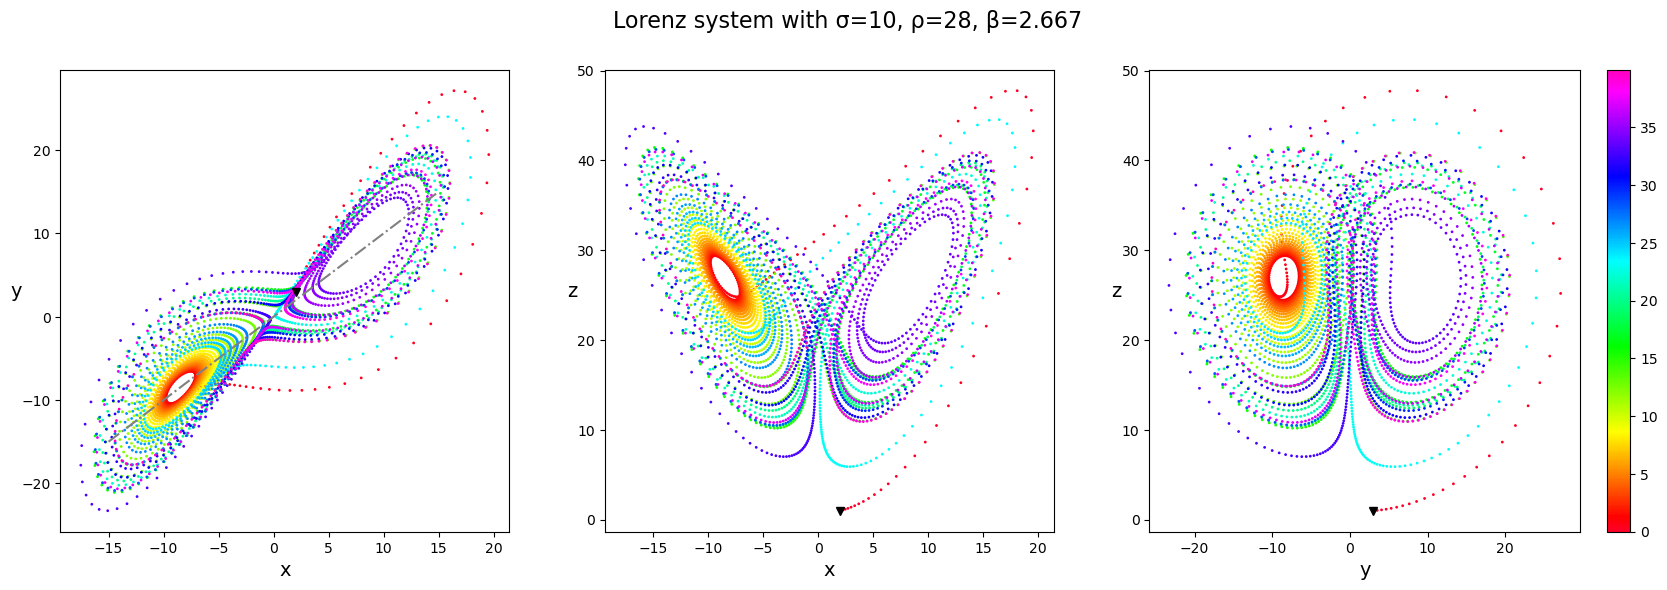

In [129]:
# The Lorenz system model. 
# The classical values are: σ = 10, ρ = 28, β = 8/3
#########################################################
#########################################################
### Parameters for this exercise:
sigma = 10  
rho = 28
beta = 8/3
#########################################################
### Initial conditions:
state_0 = [2.0, 3.0, 1.0]    # [x0,y0,z0]
#state_0 = [8.48525, 8.48525, 27.0]    # [x0,y0,z0]
#########################################################
#########################################################

def lorenz(state, t): # Function to calculate the Lorenz model
    x, y, z = state  # Unpack the state vector (3 states)
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # The 3 derivatives

t = np.arange(0.0, 40.0, 0.01)           # Time steps
states = odeint(lorenz, state_0, t)      # Integrate the system of ordinary differential equations

#¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯
# Plot the results, colored by time from the initial state (red to green to blue and purple)
# Three views are given - one for each pairing of dimensions ([x,y], [x,z] and [y,z])
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(21, 6),gridspec_kw={'width_ratios': [5,5,6]})
im1 = ax1.scatter(states[:,0],states[:,1],c=t,cmap='gist_rainbow',s=1)
im2 = ax2.scatter(states[:,0],states[:,2],c=t,cmap='gist_rainbow',s=1)
im3 = ax3.scatter(states[:,1],states[:,2],c=t,cmap='gist_rainbow',s=1)
# Mark the starting point
ax1.plot(states[0,0],states[0,1],'kv')
ax2.plot(states[0,0],states[0,2],'kv')
ax3.plot(states[0,1],states[0,2],'kv')

ax1.plot([-15,15],[-15,15],c='grey',ls='-.') # Diagonal line on the first panel, showing x=y
fig.colorbar(im3,ax=ax3)                    # Color bar to the right of the 3rd panel
ax1.set_xlabel("x",fontsize=14) ; ax1.set_ylabel("y",rotation='horizontal',fontsize=14)
ax2.set_xlabel("x",fontsize=14) ; ax2.set_ylabel("z",rotation='horizontal',fontsize=14)
ax3.set_xlabel("y",fontsize=14) ; ax3.set_ylabel("z",rotation='horizontal',fontsize=14)
fig.suptitle(f"Lorenz system with σ={sigma:.4g}, ρ={rho:.4g}, β={beta:.4g}",fontsize=16) ;

### Time to tinker

Make a copy of the cell above where you can experiment:
1. Try changing the initial conditions and see what happens (compare to above).
2. Try changing the parameters, one at a time, and see what happens (compare to above).

Text(0.5, 0.98, 'Lorenz system with σ=10, ρ=28, β=2.667')

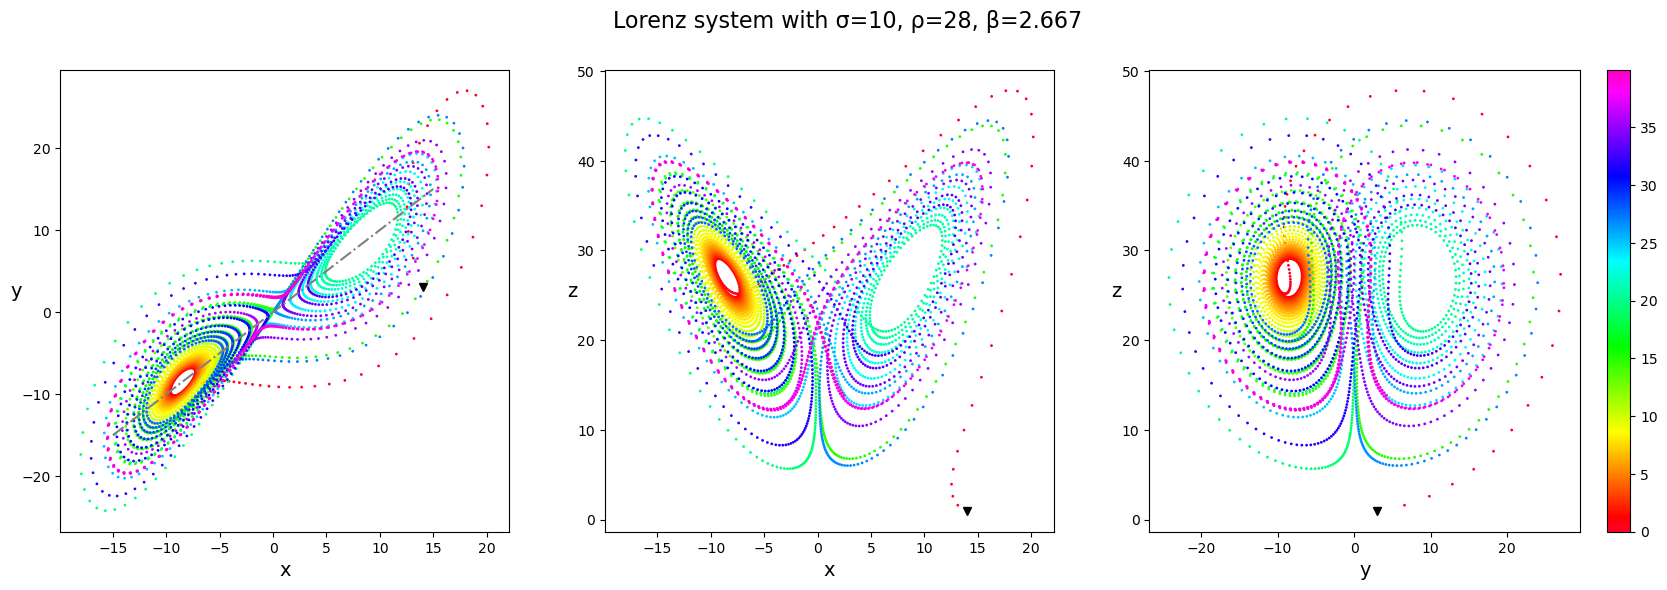

In [193]:
# The Lorenz system model. 
# The classical values are: σ = 10, ρ = 28, β = 8/3
#########################################################
#########################################################
### Parameters for this exercise:
sigma = 10  
rho = 28
beta = 8/3
#########################################################
### Initial conditions:
state_0 = [14.0, 3.0, 1.0]    # [x0,y0,z0]
# state_0 = [8.48525, 8.48525, 27.0]    # [x0,y0,z0]
# state_0 = [0.05, 0.05, 0.05]    # [x0,y0,z0]
# state_0 = [1.0, 0, 0]    # [x0,y0,z0]
#########################################################
#########################################################

def lorenz(state, t): # Function to calculate the Lorenz model
    x, y, z = state  # Unpack the state vector (3 states)
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # The 3 derivatives

t = np.arange(0.0, 40.0, 0.01)           # Time steps
states = odeint(lorenz, state_0, t)      # Integrate the system of ordinary differential equations

#¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯
# Plot the results, colored by time from the initial state (red to green to blue and purple)
# Three views are given - one for each pairing of dimensions ([x,y], [x,z] and [y,z])
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(21, 6),gridspec_kw={'width_ratios': [5,5,6]})
im1 = ax1.scatter(states[:,0],states[:,1],c=t,cmap='gist_rainbow',s=1)
im2 = ax2.scatter(states[:,0],states[:,2],c=t,cmap='gist_rainbow',s=1)
im3 = ax3.scatter(states[:,1],states[:,2],c=t,cmap='gist_rainbow',s=1)
# Mark the starting point
ax1.plot(states[0,0],states[0,1],'kv')
ax2.plot(states[0,0],states[0,2],'kv')
ax3.plot(states[0,1],states[0,2],'kv')

ax1.plot([-15,15],[-15,15],c='grey',ls='-.') # Diagonal line on the first panel, showing x=y
fig.colorbar(im3,ax=ax3)                     # Color bar to the right of the 3rd panel
ax1.set_xlabel("x",fontsize=14) ; ax1.set_ylabel("y",rotation='horizontal',fontsize=14)
ax2.set_xlabel("x",fontsize=14) ; ax2.set_ylabel("z",rotation='horizontal',fontsize=14)
ax3.set_xlabel("y",fontsize=14) ; ax3.set_ylabel("z",rotation='horizontal',fontsize=14)
fig.suptitle(f"Lorenz system with σ={sigma:.4g}, ρ={rho:.4g}, β={beta:.4g}",fontsize=16)

### Answer some questions
In the cell below, write your answers to these questions.
1. Does changing the initial state affect the result? In what way? And what about the plots seems not to change regardless how you change the initial state?
2. The "butterfly" pattern that Lorenz equations make consists of dots *orbiting* around two points. The middle of these two points is at the same value of $z$. What is it and why?
3. Think of ${dx}/{dt}$ like a velocity, indicating the distance between successive points in the X direction. What is the effect in the first equation of the term $\sigma (y - x)$ being positive versus negative, and when does each happen? A diagonal line along $x=y$ is plotted in the first panel as a visual guide.  


### Answers

1. Changing the initial state does affect the result: the starting positions of the coordinates impacts the distribution, density, spacing, and placement of the colored dots and the lines/pattern that they generate. However, in general, the overall pattern seems to stay roughly the same with many combinations of initial conditions: a figure 8 shape in the first plot, two slanted ovals closer together at their bottoms in the second plot, and two almost-circles meeting with a straighter edge in between them in the last plot. A small handful of initial conditions (like [0, 0, 1]) result in a large deviation from this pattern.

2. z = $\rho$ - 1. This is the constant z-coordinate for the pair of solutions that result from setting the RHS of the equations equal to 0 and solving for each variable (x', y', and z'), when $\rho$ is larger than 1. 

3. Assuming $\sigma$ is always positive, the term in the first equation is positive when y > x and negative when y < x. It looks like the dots are closer together (implying increased velocity) when the  values of x and y are closer in value to each other and closer to the origin (0,0), regardless of which side of the figure 8 shape the dots are denser on or the initial values of x and y. See annotated images below:

#### Initial values: [20, 3, 1]
<img width="300" alt="image" src="images/Screenshot 2026-01-26 at 10.05.42 PM.png" />

#### Initial values: [8, 8, 27]
<img width="300" alt="image" src="images/Screenshot 2026-01-26 at 10.05.52 PM.png" />

----------------

## C. Basic Budgets

In this exercise, we will use observations from a FLUXNET site, where near-surface meteorology, surface radiation, 
heat and moisture fluxes, soil temperature and water content are measured and recorded every 30 minutes.

**Instruments are not perfect** - they have both random and systematic errors, limited precision, 
calibration difficulties, and problems with drift over time. 
Furthermore, some quantities such as surface latent and sensible heat fluxes are not measured directly,
but are inferred from other measurements based on theoretical relationships and assumptions.
As a result, measurements from different instruments representing components of a budget that we know should balance perfectly, 
such as energy or water, do not always add up to zero.

**C.1**: In the plots below, the terms are abbreviated:
* `SW↓ ` = downward shortwave (solar) radiation at the surface
* `LW↓ ` = downward longwave (thermal) radiation at the surface
* `SW↑ ` = upward (reflected) shortwave radiation from the surface
* `LW↑ ` = upward (emitted) longwave radiation from the surface
* `LHF↑` = latent heat flux (via evapotranspiration) from the surface
* `SHF↑` = sensible heat flux from the surface 
* `GHF↓` = heat flux into the ground from the surface

In [194]:
# Open and prepare the data set
df = pd.read_csv("FLX_DE-Lnf_FLUXNET2015_subset_HH_2011.csv")  # Location: Leinefelde, Germany
df['TIMESTAMP_START'] = pd.to_datetime(df['TIMESTAMP_START'],format="%Y%m%d%H%M") # Timestamp in datetime format
df = df.set_index(['TIMESTAMP_START']) # Set the time as the index for the dataframe
df = df.replace(-9999,np.nan)          # Set cells with the missing value -9999 to NaN instead

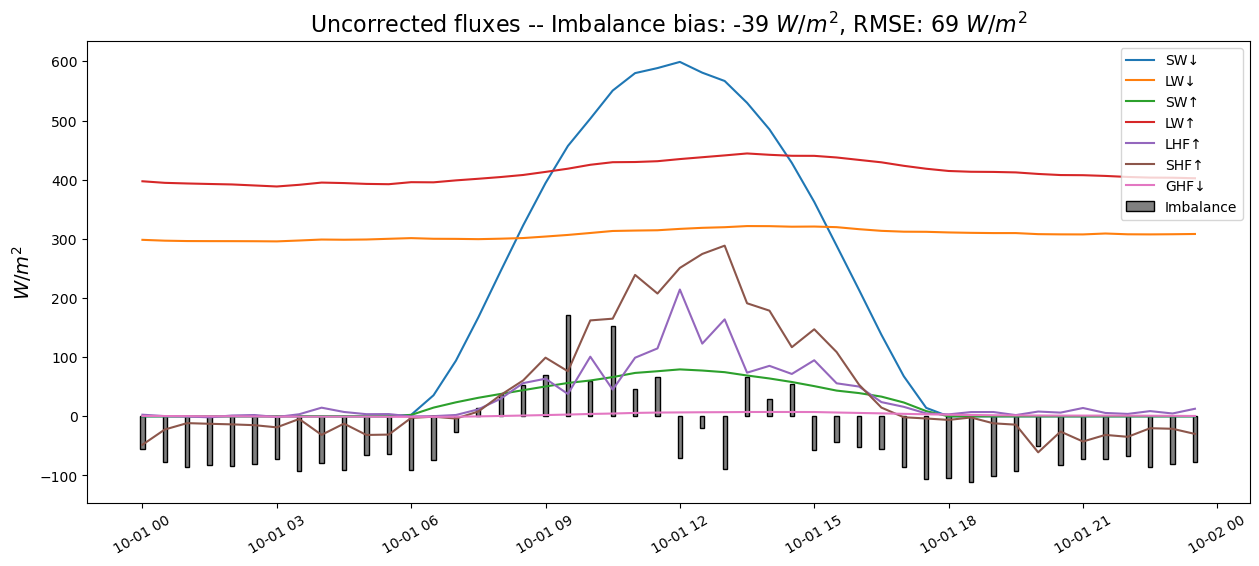

In [ ]:
# This cell generates a 1-day plot of measurements from instruments recording terms of the surface energy balance
one_day = df.loc['2011-10-01']  # Choose a single day to display

# The energy imbalance is calculated as the residual of all the suface energy budget terms: 
energy_imbalance = (one_day['SW_IN_F_MDS'] + one_day['LW_IN_F_MDS'] 
                    - one_day['SW_OUT'] - one_day['LW_OUT']
                    - one_day['LE_F_MDS'] - one_day['H_F_MDS'] - one_day['G_F_MDS'])

bias_imbalance = energy_imbalance.mean()   # Mean of the imbalance
rms_imbalance = energy_imbalance.std()     # Root mean square error (Assuming 0 imbalance is correct)
# RMSE is the standard deviation of the residuals (errors) when the mean error is zero and the denominator difference 
# ((N) vs (N-1)) is ignored or negligible (e.g., very large N). Closer to 0 = better spread. 

fig = plt.figure(figsize = (15, 6))
plt.plot(one_day[['SW_IN_F_MDS', 'LW_IN_F_MDS', 'SW_OUT', 'LW_OUT', 'LE_F_MDS', 'H_F_MDS', 'G_F_MDS']])
plt.bar(energy_imbalance.index, energy_imbalance, width=0.004, edgecolor='k', facecolor='grey')
plt.legend(["SW↓","LW↓","SW↑","LW↑","LHF↑","SHF↑","GHF↓","Imbalance"])
plt.xticks(rotation=30)
plt.ylabel("$W/m^2$", fontsize=14)
plt.title(f"Uncorrected fluxes -- Imbalance bias: {bias_imbalance:.0f} $W/m^2$, RMSE: {rms_imbalance:.0f} $W/m^2$",fontsize=16) ;

In [211]:
# energy_imbalance # one value per timestep, how much energy is "too high" or "too low"

# SW_IN_F_MDS = `SW↓ ` = downward shortwave (solar) radiation at the surface
# LW_IN_F_MDS = `LW↓ ` = downward longwave (thermal) radiation at the surface
# SW_OUT = `SW↑ ` = upward (reflected) shortwave radiation from the surface
# LW_OUT = `LW↑ ` = upward (emitted) longwave radiation from the surface
# LE_F_MDS = `LHF↑` = latent heat flux (via evapotranspiration) from the surface
# H_F_MDS = `SHF↑` = sensible heat flux from the surface 
# G_F_MDS = `GHF↓` = heat flux into the ground from the surface

# https://www.nature.com/articles/s41597-020-0534-3#Sec2 
# "Data gap-filled by MDS (applied to all variables that are gap-filled) are identified by the _F_MDS suffix."
# "It works by seeking meteorological conditions physically and temporally similar to the ones for the missing data point(s)"

data = one_day[['SW_IN_F_MDS', 'LW_IN_F_MDS', 'SW_OUT', 'LW_OUT', 'LE_F_MDS', 'H_F_MDS', 'G_F_MDS']]
print(data.mean())
print(data.max())


SW_IN_F_MDS    196.459167
LW_IN_F_MDS    314.001250
SW_OUT          27.416875
LW_OUT         366.260000
LE_F_MDS        68.526580
H_F_MDS         29.984483
G_F_MDS         -1.313542
dtype: float64
SW_IN_F_MDS    895.740
LW_IN_F_MDS    353.150
SW_OUT         119.110
LW_OUT         385.420
LE_F_MDS       405.240
H_F_MDS        255.809
G_F_MDS          2.120
dtype: float64


The cell above plots the data as measured. The cell below plots "corrected" values of latent and sensible heat flux. The corrections were applied as part of the data processing to try to reduce biases under the assumption that biases in measuring sensible and latent heat fluxes are the same (i.e., the ratio `SHF↑/LHF↑`, known as the *Bowen Ratio*, is correct). (see Section 3 of the [FLUXNET2015 data processing documentation](https://fluxnet.org/data/fluxnet2015-dataset/data-processing/) for a detailed description of the correction procedure).

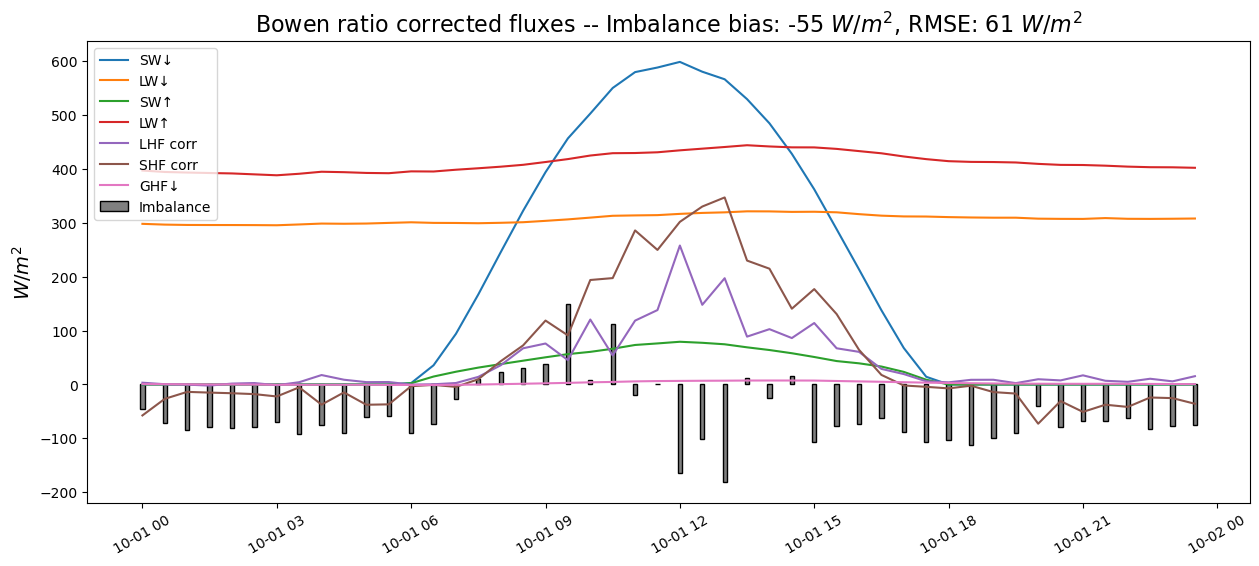

In [219]:
# Repeat for same day with the "energy balance corrected" surface heat flux terms
energy_imbalance = (one_day['SW_IN_F_MDS'] + one_day['LW_IN_F_MDS'] 
                    - one_day['SW_OUT'] - one_day['LW_OUT']
                    - one_day['LE_CORR'] - one_day['H_CORR'] - one_day['G_F_MDS'])

bias_imbalance = energy_imbalance.mean()   # Mean of the imbalance
rms_imbalance = energy_imbalance.std()     # Root mean square error (Assuming 0 imbalance is correct)

fig = plt.figure(figsize = (15, 6))
plt.plot(one_day[['SW_IN_F_MDS', 'LW_IN_F_MDS', 'SW_OUT', 'LW_OUT', 'LE_CORR', 'H_CORR', 'G_F_MDS']])
plt.bar(energy_imbalance.index, energy_imbalance, width=0.004, edgecolor='k', facecolor='grey')
plt.legend(["SW↓","LW↓","SW↑","LW↑","LHF corr","SHF corr","GHF↓","Imbalance"])
plt.xticks(rotation=30)
plt.ylabel("$W/m^2$", fontsize=14)
plt.title(f"Bowen ratio corrected fluxes -- Imbalance bias: {bias_imbalance:.0f} $W/m^2$, RMSE: {rms_imbalance:.0f} $W/m^2$",fontsize=16) ;

In [221]:
# https://fluxnet.org/data/fluxnet2015-dataset/data-processing/
# The corrected fluxes are obtained multiplying the original, gapfilled LE and H data by an energy 
# balance closure correction factor (EBC_CF), which is calculated starting from the half-hours where 
# all the components needed to calculate the energy balance closure were available — measured Net Radiation 
# and Soil Heat Flux, and measured or good quality gapfilled Latent Heat and Sensible Heat. The correction 
# factor is calculated for each half-hour as (NETRAD – G) / (H + LE), and the time series is filtered removing 
# the values that are outside 1.5 times the interquartile range and used as basis to calculate the corrected H and LE fluxes.

# to reduce biases under the assumption that biases in measuring sensible and latent heat fluxes are the same 
# (i.e., the ratio `SHF↑/LHF↑`, known as the *Bowen Ratio*, is correct)

# LE_CORR = `LHF corr` = latent heat flux (via evapotranspiration) from the surface
# H_CORR = `SHF corr` = sensible heat flux from the surface 

# one_day[['SW_IN_F_MDS', 'LW_IN_F_MDS', 'SW_OUT', 'LW_OUT', 'LE_CORR', 'H_CORR', 'G_F_MDS']]

### Answer some questions
In the cell below, write your answers to these questions.
1. Which term has the highest daily mean magnitude? The greatest peak value? Does this agree with your intuition?
2. Based on the equation for `energy_imbalance` in the code above, what's the meaning of a <u>positive</u> vs <u>negative</u> value of *imbalance*?
3. Does the "correction" improve the bias? What about the root-mean-square-error (RMSE)? Try putting in some other dates (the setting for the variable `one_day`) and comparing to see if the results are consistent; report on what you find.

### Answers

1. Upward longwave radiation has the highest daily mean magnitude (`LW_OUT = 366.260`), while downward shortwave radiation has the greatest peak value (`SW_IN_F_MDS = 895.740`) for the day we are observing. This seems logical, since the surface will always be emitting LW radiation at a fairly constant rate (during the day and overnight) while the surface will receive a higher amount of downward SW radiation at a peak time during the day. 

2. The `energy_imbalance` equation *adds* the downward energy (energy going into the surface) and *subtracts* the upward energy (energy leaving / being emitted from the surface). Therefore, a positive imbalance would mean there is more energy going into the surface than coming out, and vice versa for a negative imbalance value (there is more energy coming out of the surface than going in).

3. Using the "corrected" variables seems to reduce the bias for the original given day (**July 1st**) from 20 to 1 $W/m^2$, but the RMSE increases from 52 to 66 $W/m^2$ -- mixed results. On **January 1st**, the bias goes from 21 to 10 $W/m^2$, and RMSE goes from 22 to 20 $W/m^2$ -- overall improvement in both values. On **April 1st**, the bias goes from 2 to -7, and RMSE goes from 47 to 57 -- overall worsening in both values. On **October 1st**, the bias goes from -39 to -55, and RMSE goes from 69 to 61 -- mixed results. So it appears that, depending on the season (or perhaps the data on any given day), the "corrected" variables have differing impact on bias and RMSE, sometimes improving both, sometimes worsening both, and sometimes improving one while worsening the other.

***
**C.2**: Below, the energy budget analysis is extended to a full month....

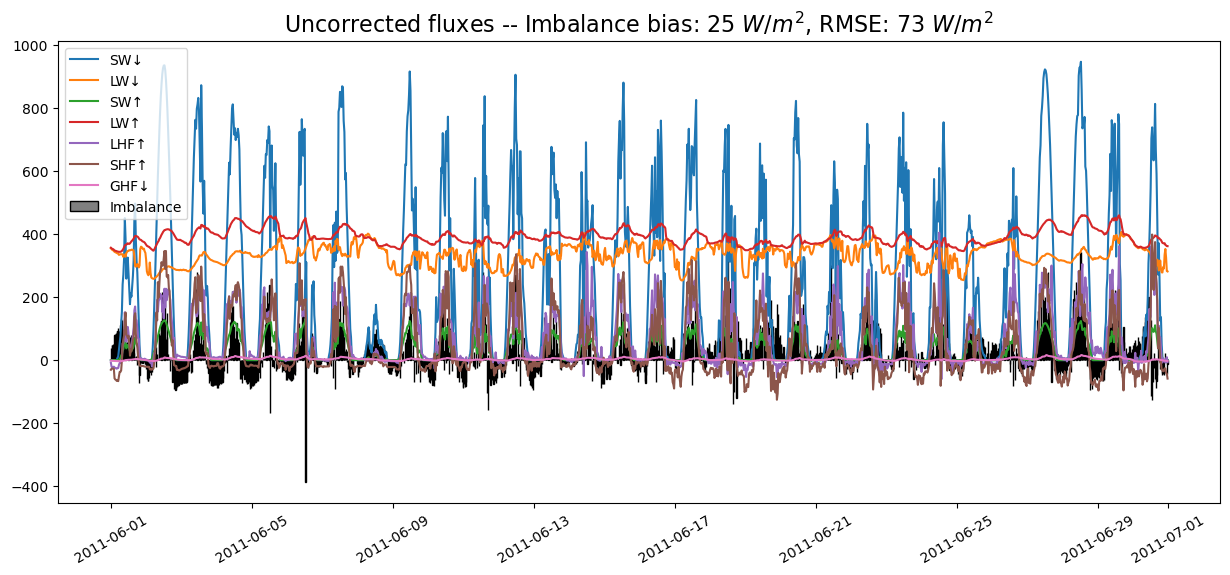

In [222]:
# This cell generates a 1-month plot of measurements from instruments recording terms of the surface energy balance
one_month = df.loc['2011-06']  # Choose a month to display
energy_imbalance = (one_month['SW_IN_F_MDS'] + one_month['LW_IN_F_MDS'] 
                    - one_month['SW_OUT'] - one_month['LW_OUT']
                    - one_month['LE_F_MDS'] - one_month['H_F_MDS'] - one_month['G_F_MDS'])

bias_imbalance = energy_imbalance.mean()   # Mean of the imbalance
rms_imbalance = energy_imbalance.std()     # Root mean square error (Assuming 0 imbalance is correct)

fig = plt.figure(figsize = (15, 6))
plt.plot(one_month[['SW_IN_F_MDS','LW_IN_F_MDS','SW_OUT','LW_OUT','LE_F_MDS','H_F_MDS','G_F_MDS']])
#plt.plot(energy_imbalance,"k:")
plt.bar(energy_imbalance.index,energy_imbalance,width=0.004,edgecolor='k',facecolor='grey')
plt.legend(["SW↓","LW↓","SW↑","LW↑","LHF↑","SHF↑","GHF↓","Imbalance"])
plt.xticks(rotation=30)
plt.title(f"Uncorrected fluxes -- Imbalance bias: {bias_imbalance:.0f} $W/m^2$, RMSE: {rms_imbalance:.0f} $W/m^2$",fontsize=16) ;

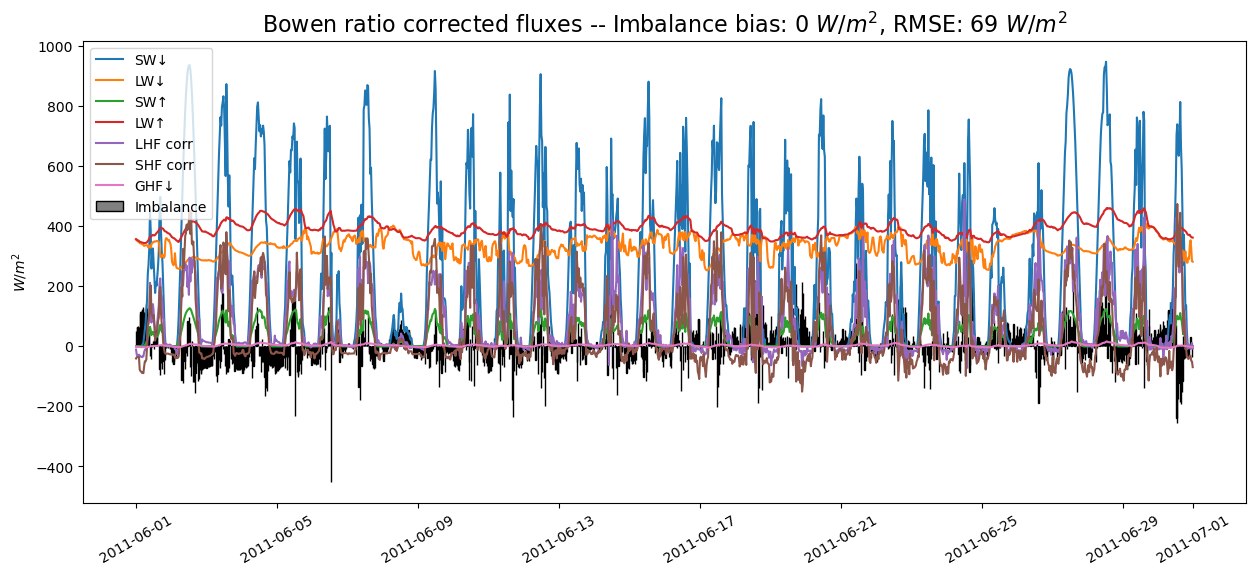

In [223]:
energy_imbalance = (one_month['SW_IN_F_MDS'] + one_month['LW_IN_F_MDS'] 
                    - one_month['SW_OUT'] - one_month['LW_OUT']
                    - one_month['LE_CORR'] - one_month['H_CORR'] - one_month['G_F_MDS'])

bias_imbalance = energy_imbalance.mean()   # Mean of the imbalance
rms_imbalance = energy_imbalance.std()     # Root mean square error (Assuming 0 imbalance is correct)

fig = plt.figure(figsize = (15, 6))
plt.plot(one_month[['SW_IN_F_MDS','LW_IN_F_MDS','SW_OUT','LW_OUT','LE_CORR','H_CORR','G_F_MDS']])
#plt.plot(energy_imbalance,"k:")
plt.bar(energy_imbalance.index,energy_imbalance,width=0.004,edgecolor='k',facecolor='grey')
plt.legend(["SW↓","LW↓","SW↑","LW↑","LHF corr","SHF corr","GHF↓","Imbalance"])
plt.xticks(rotation=30)
plt.ylabel("$W/m^2$")

plt.title(f"Bowen ratio corrected fluxes -- Imbalance bias: {bias_imbalance:.0f} $W/m^2$, RMSE: {rms_imbalance:.0f} $W/m^2$",fontsize=16) ;

### Answer some questions
In the cell below, write your answers to these questions.
1. Now the day-to-day variability in the surface energy budget can be seen. First, study only at the "uncorrected" flux panel - there are some systematic behaviors between variables ("on days when variable A does this, variable B usually does that"). Comment on what you see.
2. Now do the same for the imbalance - do you see any systematic behaviors, either within the diurnal cycle, or across different kinds of days? Explain what you see.
3. With a full month of data, you now have a fairly stable estimate of the bias and RMSE for the energy balance with uncorrected versus corrected heat fluxes. Now would you say the "correction" improve the bias? What about the root-mean-square-error (RMSE)? Comment on what the correction appears to address well, and what it does not. How might this affect your use of the data?

### Answers

1. Incoming SW radiation has a high peak each day and goes to zero each night, with some days peaking higher or lower than others. Outgoing SW has a similar diurnal pattern at a smaller scale. The peaks and troughs of the incoming and outgoing LW radiation follow similar patterns for days and nights, but with much less variance between the highs and lows; they each oscilate around a fairly high and consistent average vaule, with the incoming/downward LW radiation having more variance within individual days in the middle of the month. Both latent and sensible heat fluxes peak during the days and often have negative values overnight. 

2. It looks like the imbalance bars are larger (both in the positive and negative directions) when the incoming and outgoing LW radiation values are further apart; this can be seen most easily in the first few and last few days of the month, where the two LW lines are further from one another than in the middle of the month. Overall, the imbalance appears positive during the day and generally negative overnight.

3. For the given month, the corrected data reduces the imbalance bias from 25 to 0 $W/m^2$ and reduces the RMSE from 73 to 69 $W/m^2$. Therefore, the corrected data can be interpreted as being more "accurate" on average over the month. There is still a fair amount of spread/deviation of values around the mean, but it is important to keep in mind the sensitivity to outliers that the RMSE has (the value for this month may be large due to the large negative value on 06-06). Using the corrected data may then be better for a longer timescale (i.e. monthly or longer, as compared to the daily timescale from part C.1) if taking averages and looking at the overall energy budget, and should be useful when looking at just sensible and latent heat fluxes in isolation. 


***
**C.3**: Accumulated errors are an issue for any budget calculation. When terms are supposed to be in balance, even a very small error, if systematic, may grow to generate a significant bias.

Below, we calculate and display the cumulative sum of the imbalances over the one-month period.

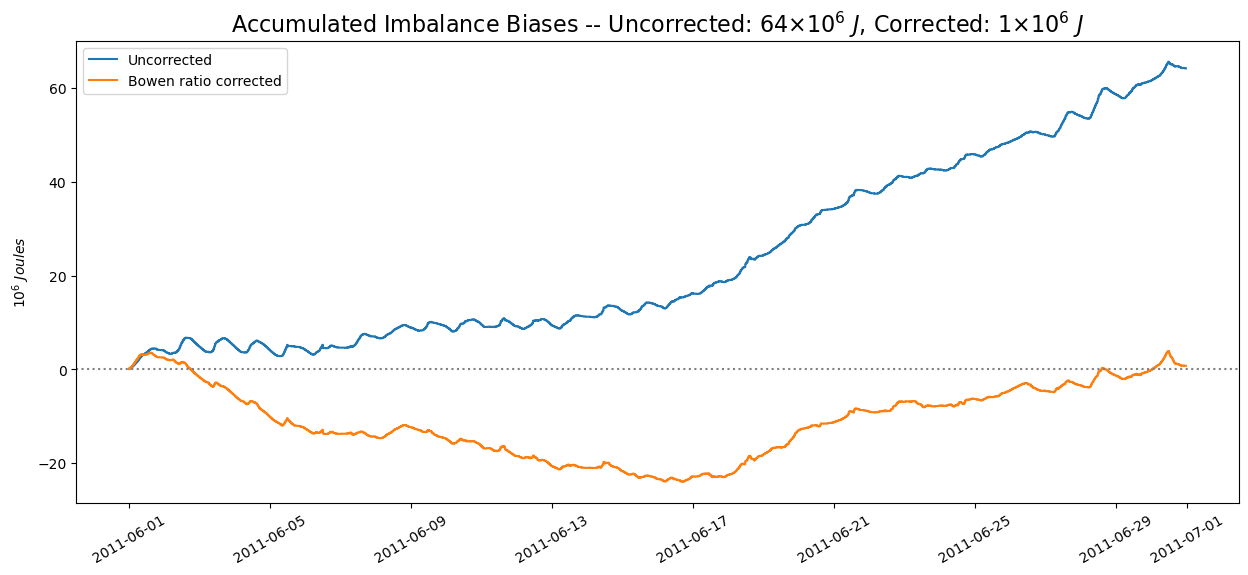

In [ ]:
uncorr_imbalance   = (one_month['SW_IN_F_MDS'] + one_month['LW_IN_F_MDS'] 
                    - one_month['SW_OUT'] - one_month['LW_OUT']
                    - one_month['LE_F_MDS'] - one_month['H_F_MDS'] - one_month['G_F_MDS'])
bowen_imbalance    = (one_month['SW_IN_F_MDS'] + one_month['LW_IN_F_MDS'] 
                    - one_month['SW_OUT'] - one_month['LW_OUT']
                    - one_month['LE_CORR'] - one_month['H_CORR'] - one_month['G_F_MDS'])

fig = plt.figure(figsize = (15, 6))
plt.step(uncorr_imbalance.index, uncorr_imbalance.cumsum()*1800/1e6)
plt.step(bowen_imbalance.index, bowen_imbalance.cumsum()*1800/1e6)
plt.legend(["Uncorrected","Bowen ratio corrected"])
plt.axhline(y=0,ls=":",c="grey")
plt.xticks(rotation=30)
plt.ylabel("$10^6 \\ Joules$")
plt.title(f"Accumulated Imbalance Biases -- Uncorrected: {uncorr_imbalance.sum()*1800/1e6:.0f}$×10^6\\ J$, Corrected: {bowen_imbalance.sum()*1800/1e6:.0f}$×10^6\\ J$",fontsize=16);

### Answer some questions
In the cell below, write your answers to these questions.
1. If you were using the uncorrected flux data to drive a model that predicts land temperature, what would happen to the predicted temperature error over the course of the month? (Clue: your {correct} answer to question 2 in C1 will help you answer this).
2. Even though the Bowen ratio correction results in a very small bias by the end of the month, there is a *wander* into a large accumulated negative bias around the middle of June. Why might this happen? (Clue: see the description of "ECB_CF Method 1" the [FLUXNET2015 data processing documentation](https://fluxnet.org/data/fluxnet2015-dataset/data-processing/)).

### Answers

1. The uncorrected bias accumulation shows an increase in energy over the course of the month, so the predicted temperature error would be highly positive; more energy would lead to a prediction of higher temperatures.

2. As the ECB_CF Method 1 uses a +/- 15 day sliding window along with a timestamp restriction of 22:00-02:30 (a window around midnight) and 10:00-14:30 (a window around noon) to avoid the "sunrise and sunset periods where changes in the heat storage in the ecosystem are more significant", we might expect this method to provide an accurate correction throughout the month. However, we see an increase in negative bias from the beginning to the middle of the month and then an increase in positive bias from the middle to the end of the month in this case. Since we are looking at the month of June and using the 50th percentile data (`LE_CORR` and `H_CORR`), this restricted period of days and times seems to lead to this pattern of bias accumulation, suggesting that the ecosystem is responding to changes in the heat storage outside of the set restrictions perhaps due to the summer season.
